In [1]:
!jt -t oceans16 -tfs 14 -fs 16 -cursw 2 -cursc r -cellw 90% -T -mathfs 110 -lineh 150
plot_theme = 'chesterish'

In [2]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D; 
import pandas as pd
import math
from IPython.display import Markdown as md
from IPython.display import display, Math # Formato LaTeX en print

In [3]:
#Parámetros de Gráficas
#parámetros matplotlib
from jupyterthemes import jtplot
jtplot.style(theme=plot_theme, context = 'talk', ticks = True, grid = False, fscale = 2)


if plot_theme == 'chesterish' or plot_theme == 'onedork': color_text = 'white'
elif plot_theme == 'grade3': color_text = 'black'
    
plt.rcParams.update({'text.usetex': True,'font.family' : 'serif', 'font.weight' : 'bold',
                     'text.color' : color_text, 'axes.labelcolor' : color_text,
                     'xtick.color' : color_text, 'ytick.color' : color_text,
                     'figure.dpi' : 100, 'savefig.format' : 'jpg', 'savefig.bbox' : 'tight',
                     'lines.linewidth': 5,
#                      'axes.titlesize' : 32, 'font.size' : 10
                    })


#plotly params
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

if plot_theme == 'chesterish' or plot_theme == 'onedork': template = 'plotly_dark'
elif plot_theme == 'grade3': template = 'seaborn'

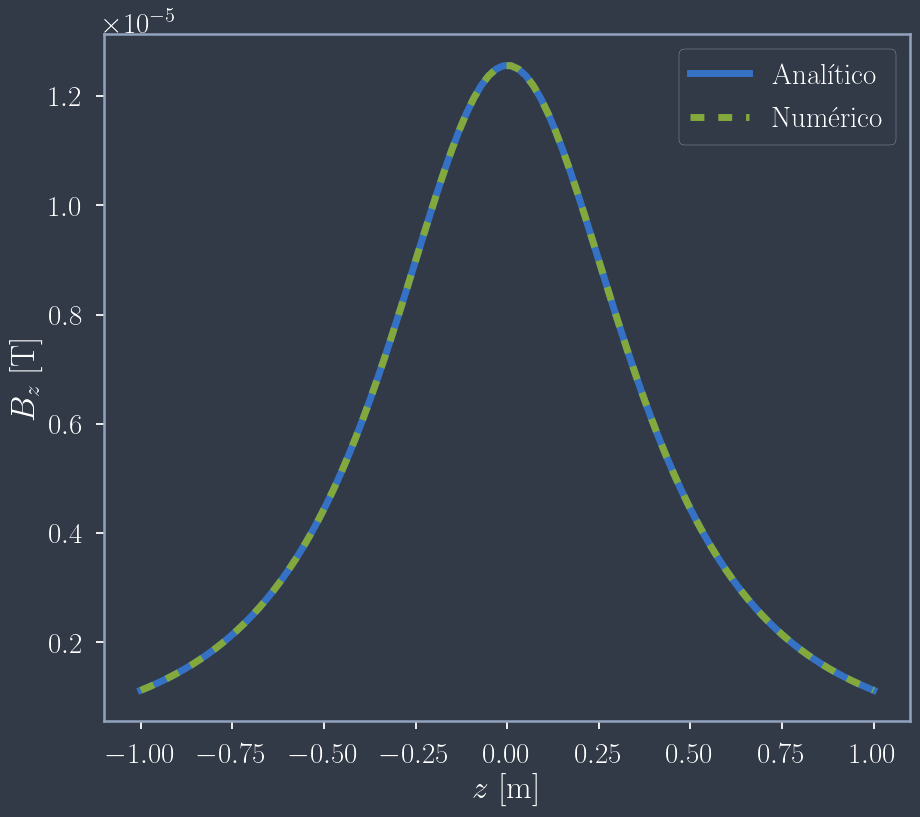

In [4]:
R = 0.5    #radius of circular current loop
I = 1

μ0 = 4*pi*10e-7
k = (μ0*I/(4*pi))
def Bfield(x,y,z, N=100, I = 1, R = 0.5):
    dθ = (2*pi)/N  #paso de integración sobre θ
    B = np.array([0,0,0])
    for θ in np.linspace(0,(2*pi) - dθ,N):
        Δr = [-R*dθ*sin(θ), R*dθ*cos(θ), 0]
        L = [x - R*cos(θ), y - R*sin(θ), z] 
        B = B + k*np.cross(Δr, L) / np.linalg.norm(L)**3
    return B


Bz_teo = lambda z: (μ0*I*R**2)/ (2*sqrt((R**2 + z**2) )**3)

z_space = np.linspace(-1,1,100)
Bz_numerico = []; Bz_analitico = []
for z in z_space:
    Bz_numerico.append(Bfield(0, 0, z)[2])
    Bz_analitico.append(Bz_teo(z))

plt.plot(z_space, Bz_analitico, label  = 'Analítico')
plt.plot(z_space,Bz_numerico, label = "Numérico", dashes=[2,2])
plt.xlabel(r'$z$ [m]')
plt.ylabel((r'$B_{z}$ [T]'))
plt.legend()